# Exploratory Data Analysis

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## Read dataset

Now we're going to read the `tubes2_HeartDisease_train` and `tubes2_HeartDisease_test`

In [2]:
heart_disease = {}
heart_disease['columns_detail'] = [
    'Age', 
    'Sex', 
    'Pain type', 
    'Blood pressure', 
    'Serum cholesterol', 
    'Fasting blood sugar > 120mg/dl', 
    'Resting ECG', 
    'Max heart rate achieved', 
    'exercise induced agina', 
    'ST depression induced by exercise relative to rest', 
    'Peak exercise ST segment', 
    'Number of major vessels colored by flourosopy', 
    'Thal', 
    'Diagnosis'
]
heart_disease['train'] = pd.read_csv('../data/tubes2_HeartDisease_train.csv')
heart_disease['test'] = pd.read_csv('../data/tubes2_HeartDisease_test.csv')

In [3]:
def fix_data(data):
    """Convert dataframe to appropriate types"""
    data.loc[data['Column3'] == 1, 'Column3'] = 'typical_agina'
    data.loc[data['Column3'] == 2, 'Column3'] = 'atypical_agina'
    data.loc[data['Column3'] == 3, 'Column3'] = 'non_aginal_pain'
    data.loc[data['Column3'] == 4, 'Column3'] = 'asymtotic'

    data.loc[data['Column7'] == '0', 'Column7'] = 'normal'
    data.loc[data['Column7'] == '1', 'Column7'] = 'having ST-T wave abnormality'
    data.loc[data['Column7'] == '2', 'Column7'] = 'left ventricular hyperthrophy'

    data.loc[data['Column11'] == '1', 'Column11'] = 'upsloping'
    data.loc[data['Column11'] == '2', 'Column11'] = 'flat'
    data.loc[data['Column11'] == '3', 'Column11'] = 'downsloping'

    data.loc[data['Column13'] == '3', 'Column13'] = 'normal'
    data.loc[data['Column13'] == '6', 'Column13'] = 'fixed_defect'
    data.loc[data['Column13'] == '7', 'Column13'] = 'reversable_defect'
    
    data.Column4 = pd.to_numeric(data.Column4, errors='coerce')
    data.Column5 = pd.to_numeric(data.Column5, errors='coerce')
    data.Column6 = pd.to_numeric(data.Column6, errors='coerce')
    data.Column8 = pd.to_numeric(data.Column8, errors='coerce')
    data.Column9 = pd.to_numeric(data.Column9, errors='coerce')
    data.Column10 = pd.to_numeric(data.Column10, errors='coerce')
    data.Column12 = pd.to_numeric(data.Column12, errors='coerce')
    return data

In [4]:
heart_disease['train'] = fix_data(heart_disease['train'])
heart_disease['train']

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14
0,54,1,asymtotic,125.0,216.0,0.0,normal,140.0,0.0,0.0,?,NaN,?,1
1,55,1,asymtotic,158.0,217.0,0.0,normal,110.0,1.0,2.5,flat,NaN,?,1
2,54,0,non_aginal_pain,135.0,304.0,1.0,normal,170.0,0.0,0.0,upsloping,0.0,normal,0
3,48,0,non_aginal_pain,120.0,195.0,0.0,normal,125.0,0.0,0.0,?,NaN,?,0
4,50,1,asymtotic,120.0,0.0,0.0,having ST-T wave abnormality,156.0,1.0,0.0,upsloping,NaN,fixed_defect,3
5,64,0,asymtotic,130.0,303.0,0.0,normal,122.0,0.0,2.0,flat,2.0,normal,0
6,63,1,asymtotic,130.0,308.0,0.0,normal,138.0,1.0,2.0,flat,NaN,?,2
7,58,1,atypical_agina,130.0,251.0,0.0,normal,110.0,0.0,0.0,?,NaN,?,0
8,42,1,atypical_agina,150.0,268.0,0.0,normal,136.0,0.0,0.0,?,NaN,?,0
9,54,1,non_aginal_pain,120.0,258.0,0.0,left ventricular hyperthrophy,147.0,0.0,4.0,flat,0.0,reversable_defect,0


Check for NULL values

In [5]:
null = [[], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
a = heart_disease['train'].isnull().sum()
null[0] = [a[i] for i in range(len(a))]
for i, col in enumerate(heart_disease['train'].columns):
    if col in ['Column7', 'Column11', 'Column13']:
        null_train = heart_disease['train'][heart_disease['train'][col].astype(str) == '?']
        null[0][i] += int(null_train.shape[0])
    null[1][i] += null[0][i] / heart_disease['train'].shape[0] * 100
    
null_df = pd.DataFrame(null, columns=heart_disease['train'].columns, index=['Num', '%'], dtype=int)
null_df

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14
Num,0,0,0,47,24,78,2,44,44,49,262,514,408,0
%,0,0,0,6,3,10,0,5,5,6,33,65,52,0


### General Data Descriptions

Age

In [6]:
heart_disease['train']['Column1'].describe()

count    779.000000
mean      53.509628
std        9.505017
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Column1, dtype: float64

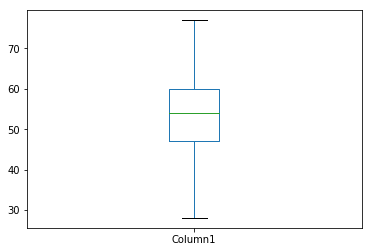

In [31]:
heart_disease['train']['Column1'].plot.box()

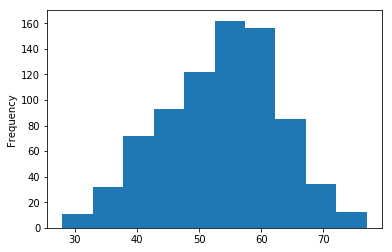

In [36]:
heart_disease['train']['Column1'].plot.hist()

Sex

In [7]:
heart_disease['train']['Column2'].describe()

count    779.000000
mean       0.779204
std        0.415050
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Column2, dtype: float64

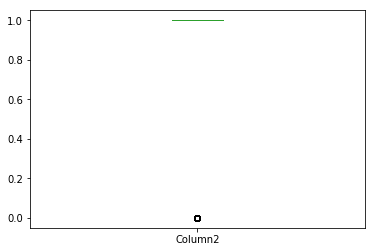

In [37]:
heart_disease['train']['Column2'].plot.box()

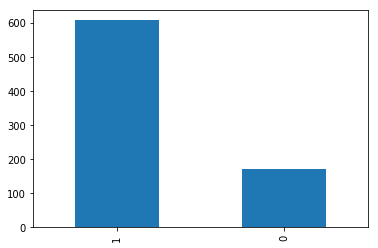

In [32]:
heart_disease['train']['Column2'].value_counts().plot.bar()

Chest pain type

In [8]:
heart_disease['train']['Column3'].describe()

count           779
unique            4
top       asymtotic
freq            426
Name: Column3, dtype: object

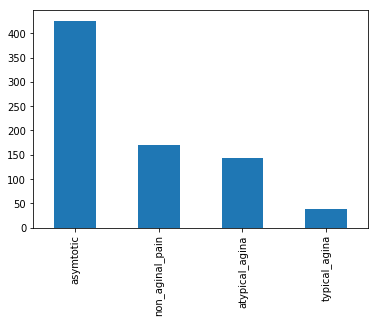

In [40]:
heart_disease['train']['Column3'].value_counts().plot.bar()

Resting blood pressure

In [9]:
heart_disease['train']['Column4'].describe()

count    732.000000
mean     132.355191
std       19.133545
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: Column4, dtype: float64

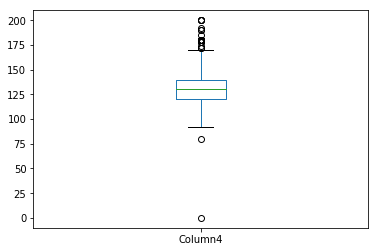

In [41]:
heart_disease['train']['Column4'].plot.box()

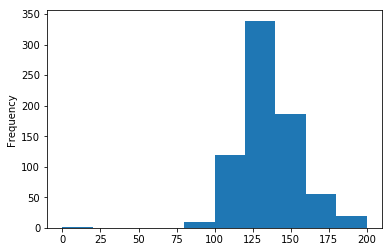

In [42]:
heart_disease['train']['Column4'].plot.hist()

Serum cholesterol

In [10]:
heart_disease['train']['Column5'].describe()

count    755.000000
mean     200.309934
std      109.938501
min        0.000000
25%      177.000000
50%      225.000000
75%      270.000000
max      529.000000
Name: Column5, dtype: float64

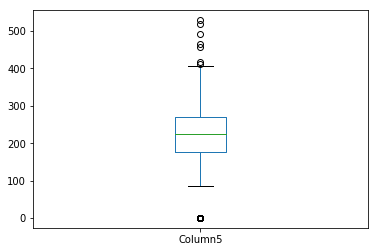

In [43]:
heart_disease['train']['Column5'].plot.box()

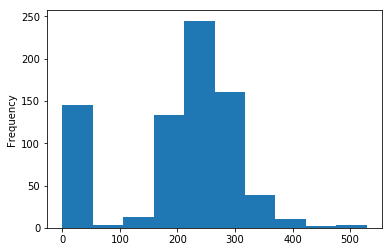

In [44]:
heart_disease['train']['Column5'].plot.hist()

Fasting blood sugar > 120mg/dl

In [11]:
heart_disease['train']['Column6'].describe()

count    701.000000
mean       0.158345
std        0.365325
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Column6, dtype: float64

In [12]:
heart_disease['train']['Column6'].mode()

0    0.0
dtype: float64

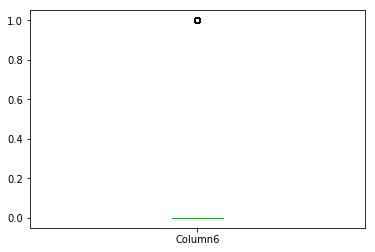

In [45]:
heart_disease['train']['Column6'].plot.box()

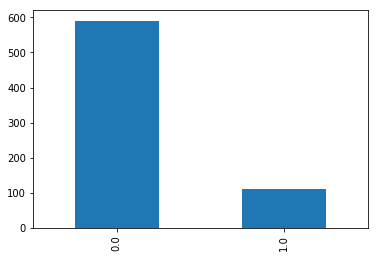

In [48]:
heart_disease['train']['Column6'].value_counts().plot.bar()

Resting ECG  

In [13]:
heart_disease['train']['Column7'].describe()

count        778
unique         4
top       normal
freq         469
Name: Column7, dtype: object

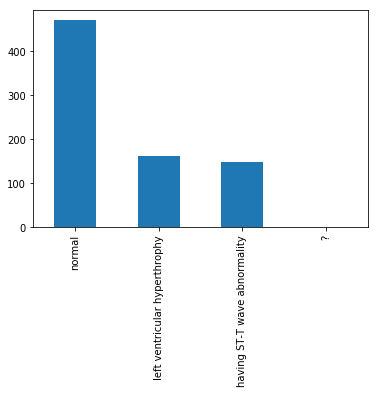

In [49]:
heart_disease['train']['Column7'].value_counts().plot.bar()

Max heart rate achieved

In [14]:
heart_disease['train']['Column8'].describe()

count    735.000000
mean     138.348299
std       26.087017
min       60.000000
25%      120.000000
50%      140.000000
75%      159.000000
max      202.000000
Name: Column8, dtype: float64

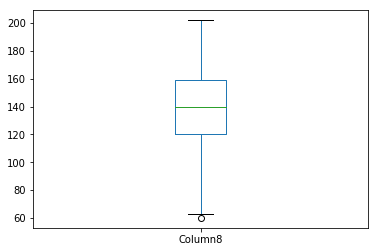

In [51]:
heart_disease['train']['Column8'].plot.box()

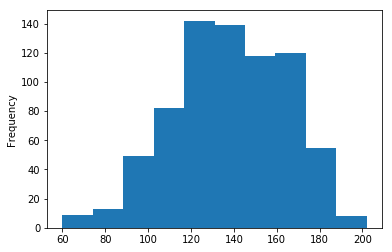

In [52]:
heart_disease['train']['Column8'].plot.hist()

exercise induced agina

In [15]:
heart_disease['train']['Column9'].describe()

count    735.000000
mean       0.391837
std        0.488493
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Column9, dtype: float64

In [16]:
heart_disease['train']['Column9'].mode()

0    0.0
dtype: float64

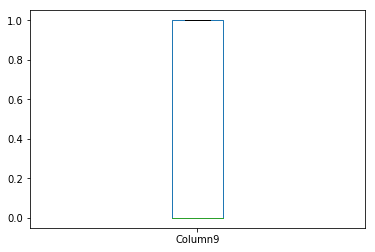

In [53]:
heart_disease['train']['Column9'].plot.box()

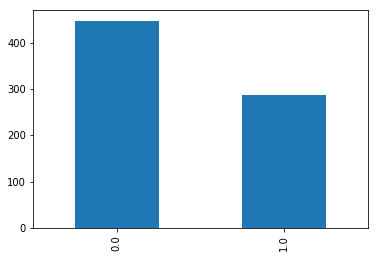

In [55]:
heart_disease['train']['Column9'].value_counts().plot.bar()

ST depression induced by exercise relative to rest

In [17]:
heart_disease['train']['Column10'].describe()

count    730.000000
mean       3.937397
std        7.788839
min       -2.600000
25%        0.000000
50%        1.000000
75%        2.950000
max       62.000000
Name: Column10, dtype: float64

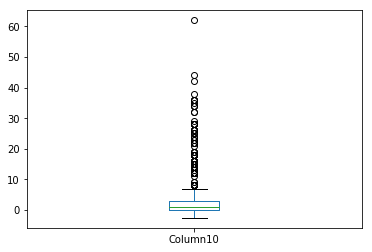

In [56]:
heart_disease['train']['Column10'].plot.box()

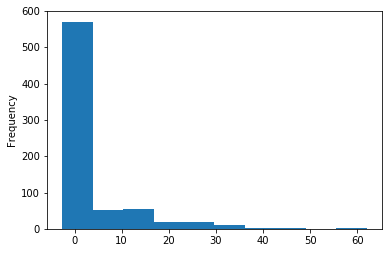

In [57]:
heart_disease['train']['Column10'].plot.hist()

Peak exercise ST segment

In [18]:
heart_disease['train']['Column11'].describe()

count      779
unique       4
top       flat
freq       288
Name: Column11, dtype: object

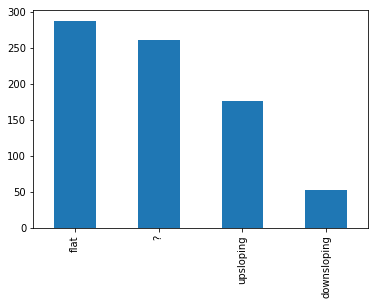

In [59]:
heart_disease['train']['Column11'].value_counts().plot.bar()

Number of major vessels colored by flourosopy

In [19]:
heart_disease['train']['Column12'].describe()

count    265.000000
mean       0.686792
std        0.935422
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: Column12, dtype: float64

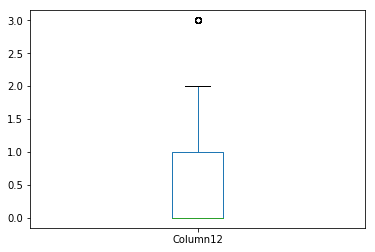

In [60]:
heart_disease['train']['Column12'].plot.box()

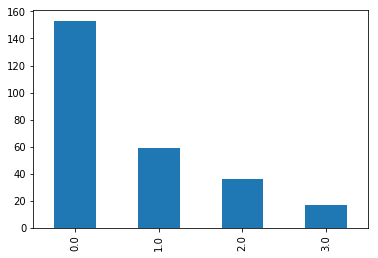

In [62]:
heart_disease['train']['Column12'].value_counts().plot.bar()

Thal

In [20]:
heart_disease['train']['Column13'].describe()

count     779
unique      4
top         ?
freq      408
Name: Column13, dtype: object

In [24]:
pd.value_counts(heart_disease['train']['Column13'].values)

?                    408
normal               173
reversable_defect    159
fixed_defect          39
dtype: int64

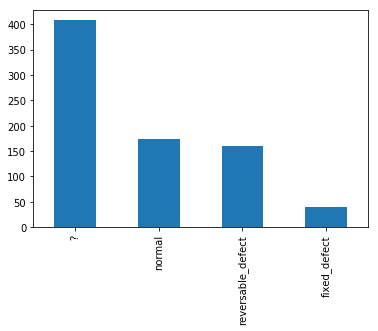

In [63]:
heart_disease['train']['Column13'].value_counts().plot.bar()

Diagnosis

In [25]:
heart_disease['train']['Column14'].describe()

count    779.000000
mean       0.989730
std        1.138211
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: Column14, dtype: float64

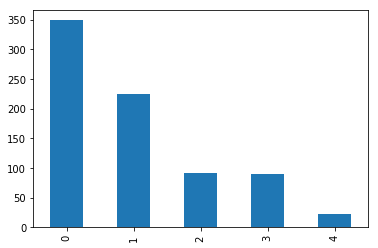

In [30]:
heart_disease['train']['Column14'].value_counts().plot.bar()

In [65]:
heart_disease['train'][heart_disease['train'].isnull()]

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
